# Extrasolar Planets Exploratory Analysis

## Introduction

In this notebook we will explore extrasolar planets dataset from data repository from Seaborn examples.

Start by import the necessary libraries for our exploratory analysis. <br> <br>
__Import libraries__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

Load the dataset from seaborn, or the data can be found on https://github.com/mwaskom/seaborn-data/blob/master/planets.csv

In [2]:
dataset = sns.load_dataset('planets')

Take a look 10 data points on top and 10 data point on bottom of our dataset!

In [3]:
dataset.head(10)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
5,Radial Velocity,1,185.840,4.80,76.39,2008
6,Radial Velocity,1,1773.400,4.64,18.15,2002
7,Radial Velocity,1,798.500,NaN,21.41,1996
8,Radial Velocity,1,993.300,10.30,73.10,2008
9,Radial Velocity,2,452.800,1.99,74.79,2010


In [4]:
dataset.tail(10)

,method,number,orbital_period,mass,distance,year
1025,Transit,1,3.067850,NaN,60.0,2012
1026,Transit,1,0.925542,NaN,470.0,2014
1027,Imaging,1,NaN,NaN,19.2,2011
1028,Transit,1,3.352057,NaN,3200.0,2012
1029,Imaging,1,NaN,NaN,10.1,2012
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


From our dataset, we see that we have 1035 data points and 6 features. Those features are: <br>
1. method: The method astronomer use to identify the extrasolar planets
2. number: The number of planets found
3. orbital_period: The orbital period in earth day
4. mass: The mass of the planet in Jupiter's mass
5. distance: The distance from the earth in light years
6. year: The year of planet being found

Now, we seperate our dataset by its method categories:

In [5]:
print(dataset['method'].unique())
print(dataset['method'].unique().shape)

['Radial Velocity' 'Imaging' 'Eclipse Timing Variations' 'Transit'
 'Astrometry' 'Transit Timing Variations' 'Orbital Brightness Modulation'
 'Microlensing' 'Pulsar Timing' 'Pulsation Timing Variations']
(10,)


There are 10 methods of finding extrasolar planets.

In [6]:
radial_velocity = dataset[dataset['method'] == 'Radial Velocity']
imaging = dataset[dataset['method'] == 'Imaging']
eclipse_timing_variations  = dataset[dataset['method'] == 'Eclipse Timing Variations']
transit = dataset[dataset['method'] == 'Transit']
astrometry = dataset[dataset['method'] == 'Astrometry']
transit_timing_variations = dataset[dataset['method'] == 'Transit Timing Variations']
orbital_brightness_modulation = dataset[dataset['method'] == 'Orbital Brightness Modulation']
microlensing = dataset[dataset['method'] == 'Microlensing']
pulsar_timing = dataset[dataset['method'] == 'Pulsar Timing']
pulsation_timing_variation = dataset[dataset['method'] == 'Pulsation Timing Variation']

---

## Explore Each Method

### Radial Velocity

How many data points in Radial Velocity?

In [7]:
print(radial_velocity.shape)

(553, 6)


How many missing data in radial velocity sub-dataset?

In [8]:
print(radial_velocity.isnull().sum())

method             0
number             0
orbital_period     0
mass              43
distance          23
year               0
dtype: int64


There are 43 missing values in column 'mass' and 23 missing values in colum 'distance'.

Descriptive statistics:

In [9]:
radial_velocity.describe()

,number,orbital_period,mass,distance,year
count,553.000000,553.00000,510.000000,530.000000,553.000000
mean,1.721519,823.35468,2.630699,51.600208,2007.518987
std,1.157141,1454.92621,3.825883,45.559381,4.249052
min,1.000000,0.73654,0.003600,1.350000,1989.000000
25%,1.000000,38.02100,0.225250,24.412500,2005.000000
50%,1.000000,360.20000,1.260000,40.445000,2009.000000
75%,2.000000,982.00000,3.000000,59.217500,2011.000000
max,6.000000,17337.50000,25.000000,354.000000,2014.000000


By looking table above, we know several important facts: <br>
- The number of planets found is 553.
- The average orbital period of planets is 823.35 days (earth day). Which is greater than earth's but less than jupiter's.
- The average mass of planet is 2.6 jupiter's mass.
- The average distance of extrasolar planets from earth is 51.6 light years.
- The closest extrasolar planet is 1.35 light years. (it's weird, probably an outlier)
- The fartest extrasolar planet is 354 light years.
- The first planet found by radial velocity method is 1989
- The last planet found by radial velocity method is 2014

We drop data points with missing value

In [10]:
radial_velocity = radial_velocity.dropna()

Now, consider the distribution by each features:

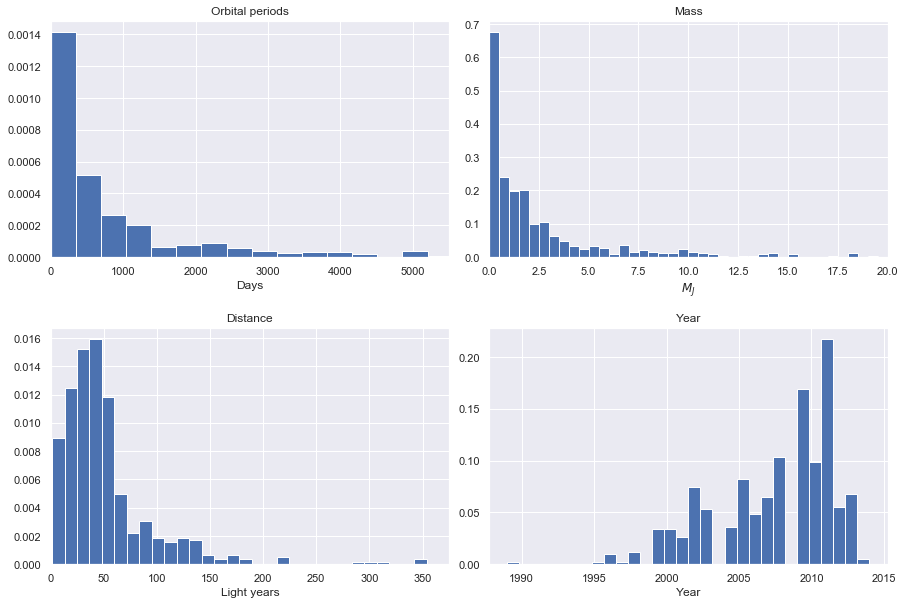

In [11]:
f, ax = plt.subplots(2, 2, figsize=(15, 10))
f.subplots_adjust(hspace=0.3, wspace=0.1)

ax[0, 0].hist(radial_velocity['orbital_period'], bins=50, density=True);
ax[0, 0].set_xlim(0, 5500);
ax[0, 0].set_xlabel('Days')
ax[0, 0].set_title('Orbital periods');

ax[0, 1].hist(radial_velocity['mass'], bins=50, density=True);
ax[0, 1].set_xlim(0, 20)
ax[0, 1].set_xlabel('$M_{J}$')
ax[0, 1].set_title('Mass');

ax[1, 0].hist(radial_velocity['distance'], bins=30, density=True)
ax[1, 0].set_xlim(0, 375)
ax[1, 0].set_xlabel('Light years')
ax[1, 0].set_title('Distance');

ax[1, 1].hist(radial_velocity['year'], bins=30, density=True)
ax[1, 1].set_xlabel('Year')
ax[1, 1].set_title('Year');

### Imaging

How many data points in Imaging?

In [16]:
print(imaging.shape)

(38, 6)


How many missing data in Imaging sub-dataset?

In [17]:
print(imaging.isnull().sum())

method             0
number             0
orbital_period    26
mass              38
distance           6
year               0
dtype: int64


There are 26 missing values in column 'orbital_period' and 38 missing values in column 'mass'. Since the data is small, we preserve the row with missing values.

Descriptive statistics:

In [18]:
imaging.describe()

,number,orbital_period,mass,distance,year
count,38.000000,12.000000,0.0,32.000000,38.000000
mean,1.315789,118247.737500,NaN,67.715937,2009.131579
std,0.933035,213978.177277,NaN,53.736817,2.781901
min,1.000000,4639.150000,NaN,7.690000,2004.000000
25%,1.000000,8343.900000,NaN,22.145000,2008.000000
50%,1.000000,27500.000000,NaN,40.395000,2009.000000
75%,1.000000,94250.000000,NaN,132.697500,2011.000000
max,4.000000,730000.000000,NaN,165.000000,2013.000000


In [19]:
imaging.head()

,method,number,orbital_period,mass,distance,year
29,Imaging,1,NaN,NaN,45.52,2005
30,Imaging,1,NaN,NaN,165.00,2007
31,Imaging,1,NaN,NaN,140.00,2004
33,Imaging,1,NaN,NaN,NaN,2008
34,Imaging,1,NaN,NaN,145.00,2013


By look at the descriptive statistics, we could hypothesize that finding extrasolar planet by imaging method, doesn't give us a good knowledge about planet's orbital period and mass. Especially mass, since astronomers found 38 data points by imaging yet don't know the mass for all the planet.

Now, consider the distribution by each features:

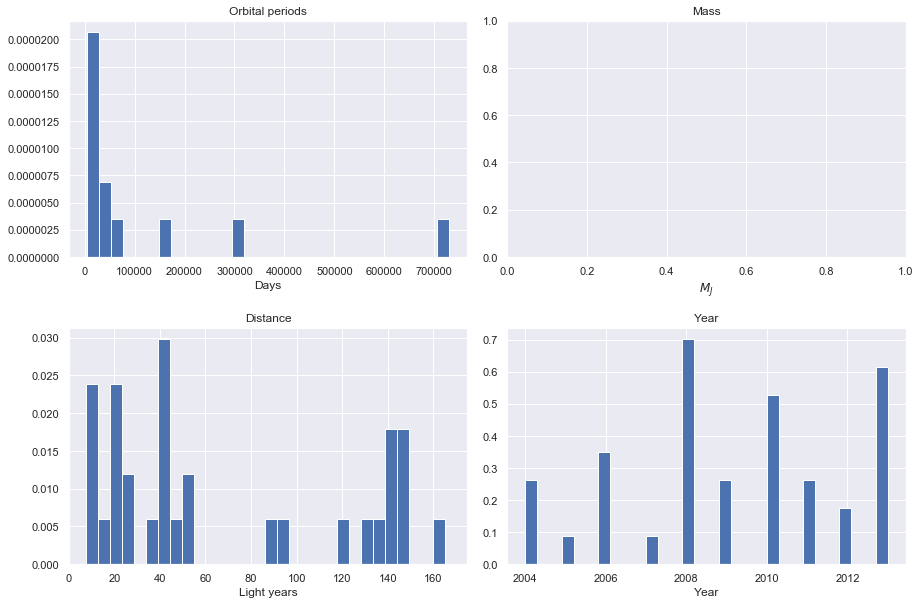

In [30]:
f, ax = plt.subplots(2, 2, figsize=(15, 10))
f.subplots_adjust(hspace=0.3, wspace=0.1)

ax[0, 0].hist(imaging['orbital_period'], bins=30, density=True);
ax[0, 0].set_xlabel('Days')
ax[0, 0].set_title('Orbital periods');

ax[0, 1].set_xlabel('$M_{J}$')
ax[0, 1].set_title('Mass')

ax[1, 0].hist(imaging['distance'], bins=30, density=True)
ax[1, 0].set_xlim(0, 175)
ax[1, 0].set_xlabel('Light years')
ax[1, 0].set_title('Distance');

ax[1, 1].hist(imaging['year'], bins=30, density=True)
ax[1, 1].set_xlabel('Year')
ax[1, 1].set_title('Year');

We empty the axes for mass because we have no data for it.

### Eclipse Timing Variations

How many data points in Eclipse Timing Variations?

In [31]:
eclipse_timing_variations.shape

(9, 6)

How many missing data in Eclipse Timing Variations sub-dataset?

In [33]:
print(eclipse_timing_variations.isnull().sum())

method            0
number            0
orbital_period    0
mass              7
distance          5
year              0
dtype: int64


Descriptive statistics:

In [34]:
eclipse_timing_variations.describe()

,number,orbital_period,mass,distance,year
count,9.000000,9.000000,2.000000,4.000000,9.000000
mean,1.666667,4751.644444,5.125000,315.360000,2010.000000
std,0.500000,2499.130945,1.308148,213.203907,1.414214
min,1.000000,1916.250000,4.200000,130.720000,2008.000000
25%,1.000000,2900.000000,4.662500,130.720000,2009.000000
50%,2.000000,4343.500000,5.125000,315.360000,2010.000000
75%,2.000000,5767.000000,5.587500,500.000000,2011.000000
max,2.000000,10220.000000,6.050000,500.000000,2012.000000


In [35]:
eclipse_timing_variations.head()

,method,number,orbital_period,mass,distance,year
32,Eclipse Timing Variations,1,10220.00,6.05,NaN,2009
37,Eclipse Timing Variations,2,5767.00,NaN,130.72,2008
38,Eclipse Timing Variations,2,3321.00,NaN,130.72,2008
39,Eclipse Timing Variations,2,5573.55,NaN,500.00,2010
40,Eclipse Timing Variations,2,2883.50,NaN,500.00,2010


Now, consider the distribution:

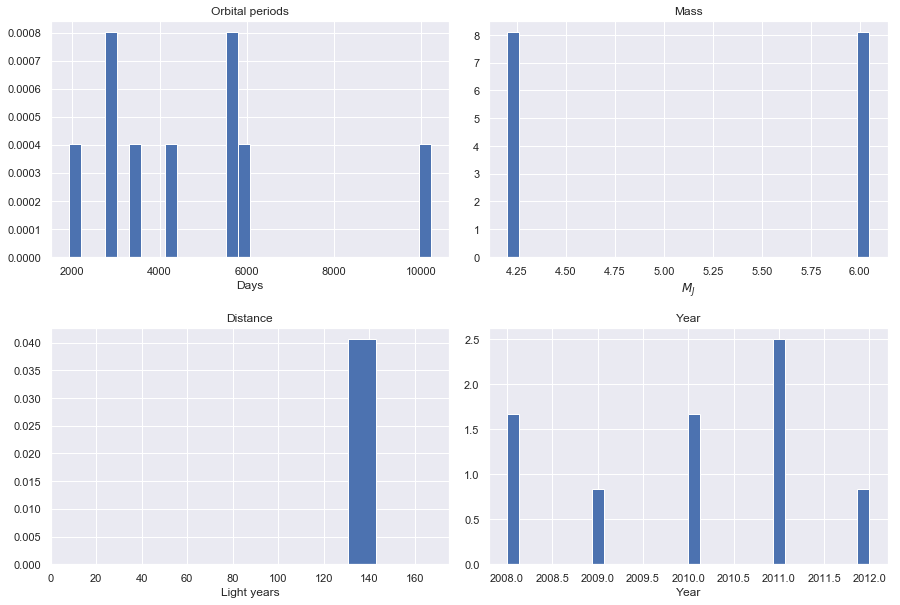

In [37]:
f, ax = plt.subplots(2, 2, figsize=(15, 10))
f.subplots_adjust(hspace=0.3, wspace=0.1)

ax[0, 0].hist(eclipse_timing_variations['orbital_period'], bins=30, density=True);
ax[0, 0].set_xlabel('Days')
ax[0, 0].set_title('Orbital periods');

ax[0, 1].hist(eclipse_timing_variations['mass'], bins=30, density=True)
ax[0, 1].set_xlabel('$M_{J}$')
ax[0, 1].set_title('Mass')

ax[1, 0].hist(eclipse_timing_variations['distance'], bins=30, density=True)
ax[1, 0].set_xlim(0, 175)
ax[1, 0].set_xlabel('Light years')
ax[1, 0].set_title('Distance');

ax[1, 1].hist(eclipse_timing_variations['year'], bins=30, density=True)
ax[1, 1].set_xlabel('Year')
ax[1, 1].set_title('Year');

### Transit

How many data points in Transit?

In [38]:
transit.shape

(397, 6)

How many missing data in Eclipse Timing Variations sub-dataset?

In [40]:
print(transit.isnull().sum())

method              0
number              0
orbital_period      0
mass              396
distance          173
year                0
dtype: int64


Descriptive statistics:

In [41]:
transit.describe()

,number,orbital_period,mass,distance,year
count,397.000000,397.000000,1.00,224.00000,397.000000
mean,1.954660,21.102073,1.47,599.29808,2011.236776
std,1.399119,46.185893,NaN,913.87699,2.077867
min,1.000000,0.355000,1.47,38.00000,2002.000000
25%,1.000000,3.160630,1.47,200.00000,2010.000000
50%,1.000000,5.714932,1.47,341.00000,2012.000000
75%,2.000000,16.145700,1.47,650.00000,2013.000000
max,7.000000,331.600590,1.47,8500.00000,2014.000000


Now, consider the distribution:

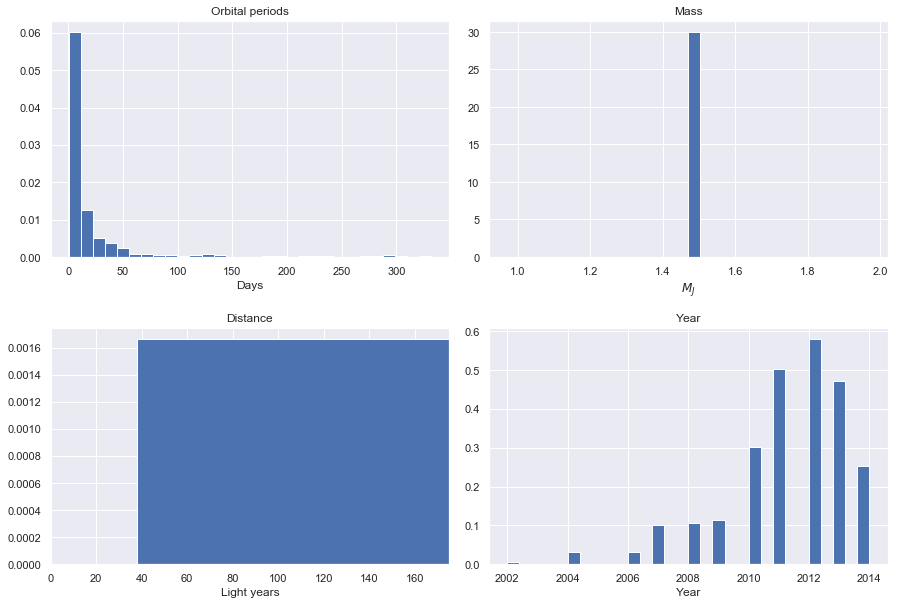

In [42]:
f, ax = plt.subplots(2, 2, figsize=(15, 10))
f.subplots_adjust(hspace=0.3, wspace=0.1)

ax[0, 0].hist(transit['orbital_period'], bins=30, density=True);
ax[0, 0].set_xlabel('Days')
ax[0, 0].set_title('Orbital periods');

ax[0, 1].hist(transit['mass'], bins=30, density=True)
ax[0, 1].set_xlabel('$M_{J}$')
ax[0, 1].set_title('Mass')

ax[1, 0].hist(transit['distance'], bins=30, density=True)
ax[1, 0].set_xlim(0, 175)
ax[1, 0].set_xlabel('Light years')
ax[1, 0].set_title('Distance');

ax[1, 1].hist(transit['year'], bins=30, density=True)
ax[1, 1].set_xlabel('Year')
ax[1, 1].set_title('Year');

### Astrometry

How many data points in Astrometry?

In [43]:
astrometry.shape

(2, 6)

How many missing data?

In [44]:
print(astrometry.isnull().sum())

method            0
number            0
orbital_period    0
mass              2
distance          0
year              0
dtype: int64


Descriptive statistics:

In [45]:
astrometry.describe()

,number,orbital_period,mass,distance,year
count,2.0,2.000000,0.0,2.000000,2.00000
mean,1.0,631.180000,NaN,17.875000,2011.50000
std,0.0,544.217663,NaN,4.094148,2.12132
min,1.0,246.360000,NaN,14.980000,2010.00000
25%,1.0,438.770000,NaN,16.427500,2010.75000
50%,1.0,631.180000,NaN,17.875000,2011.50000
75%,1.0,823.590000,NaN,19.322500,2012.25000
max,1.0,1016.000000,NaN,20.770000,2013.00000


### Transit Timing Variations

How many data points in Transit Timing Variations?

In [46]:
transit_timing_variations.shape

(4, 6)

How many missing values?

In [47]:
print(transit_timing_variations.isnull().sum())

method            0
number            0
orbital_period    1
mass              4
distance          1
year              0
dtype: int64


Descriptive statistics:

In [48]:
transit_timing_variations.describe()

,number,orbital_period,mass,distance,year
count,4.00,3.000000,0.0,3.000000,4.000000
mean,2.25,79.783500,NaN,1104.333333,2012.500000
std,0.50,71.599884,NaN,915.819487,1.290994
min,2.00,22.339500,NaN,339.000000,2011.000000
25%,2.00,39.675250,NaN,597.000000,2011.750000
50%,2.00,57.011000,NaN,855.000000,2012.500000
75%,2.25,108.505500,NaN,1487.000000,2013.250000
max,3.00,160.000000,NaN,2119.000000,2014.000000


### Orbital Brightness Modulations

How many data points?

In [50]:
orbital_brightness_modulation.shape

(3, 6)

How many missing values?

In [51]:
print(orbital_brightness_modulation.isnull().sum())

method            0
number            0
orbital_period    0
mass              3
distance          1
year              0
dtype: int64


Descriptive statistics:

In [52]:
orbital_brightness_modulation.describe()

,number,orbital_period,mass,distance,year
count,3.000000,3.000000,0.0,2.0,3.000000
mean,1.666667,0.709307,NaN,1180.0,2011.666667
std,0.577350,0.725493,NaN,0.0,1.154701
min,1.000000,0.240104,NaN,1180.0,2011.000000
25%,1.500000,0.291496,NaN,1180.0,2011.000000
50%,2.000000,0.342887,NaN,1180.0,2011.000000
75%,2.000000,0.943908,NaN,1180.0,2012.000000
max,2.000000,1.544929,NaN,1180.0,2013.000000


### Micro Lensing

How many data points?

In [55]:
microlensing.shape

(23, 6)

How many missing values?

In [56]:
print(microlensing.isnull().sum())

method             0
number             0
orbital_period    16
mass              23
distance          13
year               0
dtype: int64


Descriptive statistics:

In [57]:
microlensing.describe()

,number,orbital_period,mass,distance,year
count,23.000000,7.000000,0.0,10.000000,23.000000
mean,1.173913,3153.571429,NaN,4144.000000,2009.782609
std,0.387553,1113.166333,NaN,2076.611556,2.859697
min,1.000000,1825.000000,NaN,1760.000000,2004.000000
25%,1.000000,2375.000000,NaN,2627.500000,2008.000000
50%,1.000000,3300.000000,NaN,3840.000000,2010.000000
75%,1.000000,3550.000000,NaN,4747.500000,2012.000000
max,2.000000,5100.000000,NaN,7720.000000,2013.000000


### Pulsar Timing

How many data points?

In [58]:
pulsar_timing.shape

(5, 6)

How many missing values?

In [59]:
print(pulsar_timing.isnull().sum())

method            0
number            0
orbital_period    0
mass              5
distance          4
year              0
dtype: int64


Descriptive statistics:

In [61]:
pulsar_timing.describe()

,number,orbital_period,mass,distance,year
count,5.000000,5.000000,0.0,1.0,5.00000
mean,2.200000,7343.021201,NaN,1200.0,1998.40000
std,1.095445,16313.265573,NaN,NaN,8.38451
min,1.000000,0.090706,NaN,1200.0,1992.00000
25%,1.000000,25.262000,NaN,1200.0,1992.00000
50%,3.000000,66.541900,NaN,1200.0,1994.00000
75%,3.000000,98.211400,NaN,1200.0,2003.00000
max,3.000000,36525.000000,NaN,1200.0,2011.00000


### Pulsation Timing Variations

How many data points?

In [63]:
pulsation_timing_variation.shape

(0, 6)

Doesn't have any data!